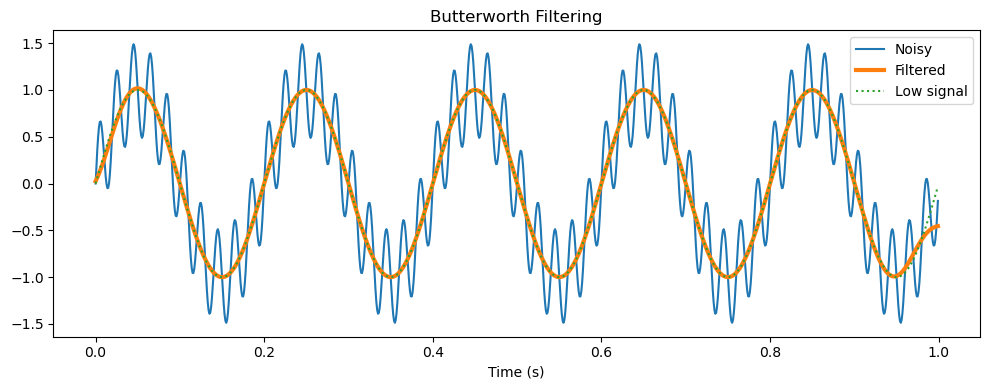

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)
low_freq = np.sin(2*np.pi*5*t)  # 5 Hz 
high_freq = 0.5*np.sin(2*np.pi*50*t)  # 50 Hz noise
signal = low_freq + high_freq

# Butterworth low-pass filter
nyq = 0.5 * fs
cutoff = 15  # Hz
b, a = butter(4, cutoff/nyq, btype='low')
filtered = filtfilt(b, a, signal)

# Plot
plt.figure(figsize=(10,4))
plt.plot(t, signal, label='Noisy')
plt.plot(t, filtered, label='Filtered', linewidth=3)
plt.plot(t, low_freq, label='Low signal', linestyle=':')
plt.title('Butterworth Filtering')
plt.xlabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()

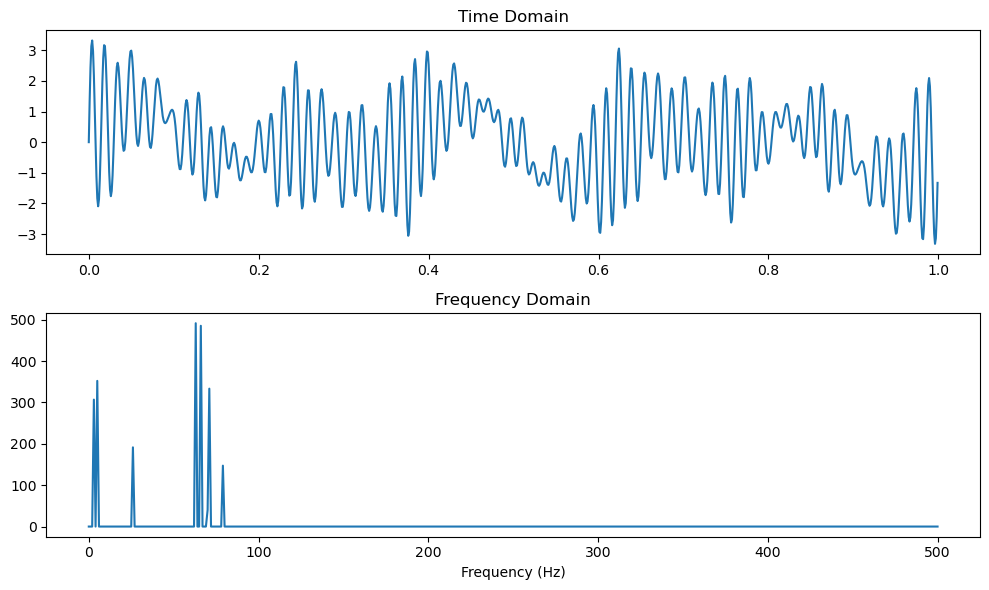

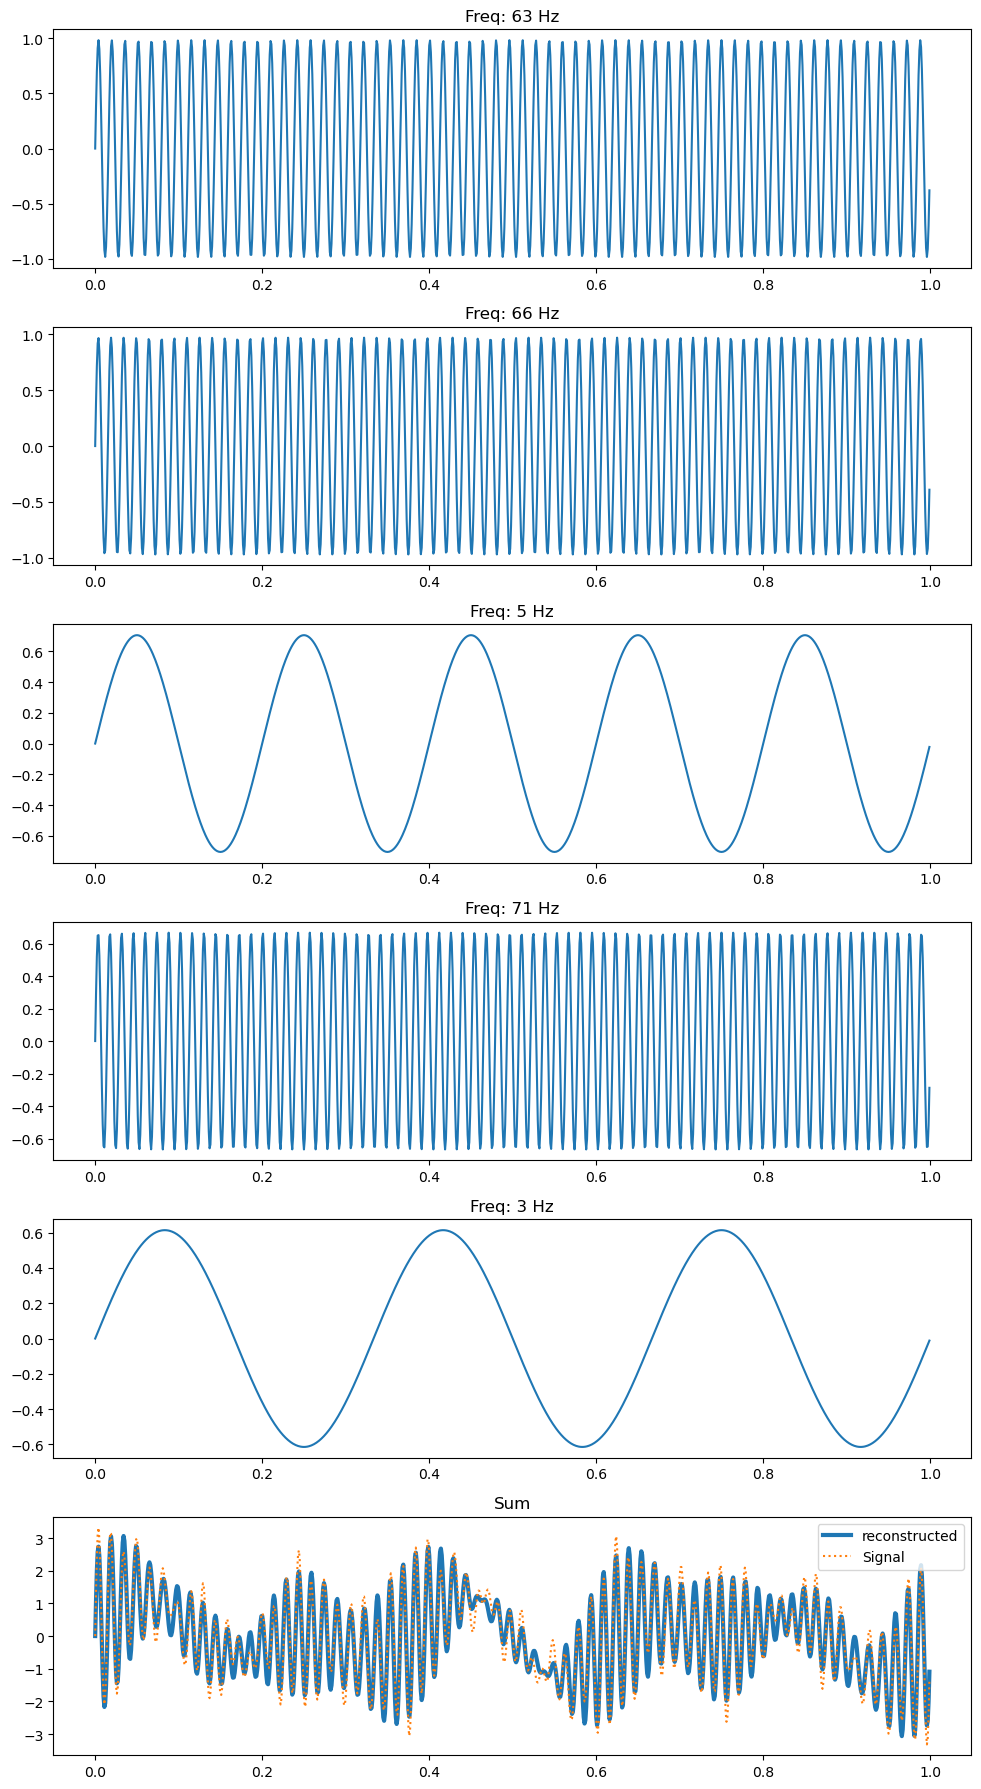

In [2]:
from scipy.fft import rfft, irfft, rfftfreq

# Generate signal
max_freqs = 8
freqs = np.random.randint(1, 100, max_freqs)
amps = np.random.uniform(0, 1, size=max_freqs)
signal = sum(a*np.sin(2*np.pi*f*t) for f, a in zip(freqs, amps))

# Compute FFT
N = len(signal)
yf = rfft(signal)# [:N//2]
xf = rfftfreq(N, 1/fs)#[:N//2]

# Plot
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(t, signal)
plt.title('Time Domain')
plt.subplot(212)
plt.plot(xf, np.abs(yf))
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


# Reconstruct
yf_abs = np.abs(yf)
p = .80

total = yf_abs.sum()
idx_sort = np.argsort(yf_abs)[::-1]
cumsum = yf_abs[idx_sort].cumsum()
N_freq = np.argmax((cumsum/total) > p)
dec_freqs = idx_sort[:N_freq + 1]

dec_signals = {}
for f in dec_freqs:
    temp_yf = np.zeros_like(yf)
    temp_yf[f] = yf[f]
    dec_signals[f] = irfft(temp_yf)

N_splot = len(dec_freqs) + 1
fig, ax = plt.subplots(figsize=(10,3*N_splot), nrows=N_splot)
for ii, (a_freq, a_signal) in enumerate(dec_signals.items()):
    ax[ii].plot(t, a_signal)
    ax[ii].set_title(f'Freq: {a_freq} Hz')

ax[-1].plot(t, sum(a_sig for a_sig in dec_signals.values()),
            label='reconstructed', linewidth=3)
ax[-1].plot(t, signal,
            label='Signal', linestyle=':')
ax[-1].set_title('Sum')
ax[-1].legend()
plt.tight_layout()
plt.show()
